# ENGR421

# Homework 08: Expectation-Maximization Clustering

# Özge Sayar

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.spatial as spa
import scipy.stats as st

#### Import Data 

In [31]:
initial_centroids = np.genfromtxt("hw08_initial_centroids.csv", delimiter=",")
data_set = np.genfromtxt("hw08_data_set.csv", delimiter=",")

#### Parameters 

In [53]:
np.random.seed(421)

#mean parameters
cluster_means = np.array([[+5.0, +5.0], #mean1
                         [-5.0, +5.0], #mean2
                         [-5.0, -5.0], #mean3
                         [+5.0, -5.0], #mean4
                         [+5.0, +0.0], #mean5
                         [+0.0, +5.0], #mean6
                         [-5.0, +0.0], #mean7
                         [+0.0, -5.0], #mean8
                         [+0.0, +0.0]]) #mean9
#covarience parameters
cluster_covariences = np.array([[[+0.8, -0.6],  #covarience1
                                 [-0.6, +0.8]],
                                [[+0.8, +0.6],  #covarience2
                                 [+0.6, +0.8]],
                                [[+0.8, -0.6],  #covarience3
                                 [-0.6, +0.8]],
                                [[+0.8, +0.6],  #covarience4
                                 [+0.6, +0.8]],
                                [[+0.2, +0.0],  #covarience5
                                 [+0.0, +1.2]],
                                [[+1.2, +0.0],  #covarience6
                                 [+0.0, +0.2]],
                                [[+0.2, +0.0],  #covarience7
                                 [+0.0, +1.2]],
                                [[+1.2, +0.0],  #covarience8
                                 [+0.0, +0.2]],
                                [[+1.6, +0.0],  #covarience9
                                 [+0.0, +1.6]]])

cluster_sizes = np.array([100, 100, 100, 100, 100, 100, 100, 100, 200])

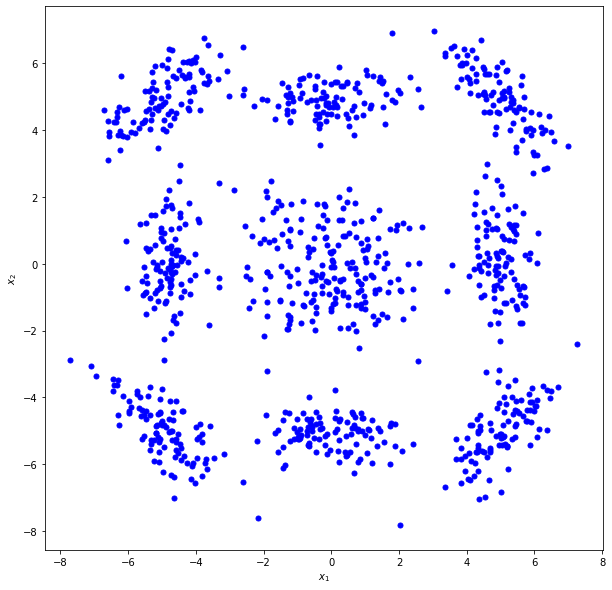

In [54]:
K = 9
N = X.shape[0]

# Plotting Data
plt.figure(figsize=(10, 10))
plt.plot(data_set[:, 0], data_set[:, 1], "b.", markersize=10)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.show()

#### EM Algorithm

In [57]:
#Algorithm Steps

def E_Step(class_means, class_covariances, prior_probabilities):
    memberships = np.zeros((N, K))
    for k in range (K):
        for i in range(N):
            num = st.multivariate_normal.pdf(data_set[i], class_means[k], class_covariances[k])*prior_probabilities[k]
            denom = np.sum([st.multivariate_normal.pdf(data_set[i], class_means[c], class_covariances[c]) * prior_probabilities[c] for c in range(K)], axis = 0)
            memberships[i,k] = num/denom
    return memberships   
                      
                                             
def M_Step(memberships):
    class_covariances = np.zeros(shape=(K, data_set.shape[1], data_set.shape[1]))
    class_means = np.zeros((K, data_set.shape[1]))
    prior_probabilities = np.zeros((K))             
    
    for k in range (K):
        class_covariances[k] = np.sum([np.multiply(np.matmul(np.transpose(np.asmatrix(data_set[i] - class_means[k])), np.asmatrix(X[i] - class_means[k])), memberships[i, k]) for i in range(N)], axis = 0) / np.sum(memberships[range(N), k])
    
    for k in range (K):
        class_means[k] = np.sum([data_set[i]*memberships[i, k] for i in range(N)], axis = 0)/ np.sum(memberships[range(N), k])
    
    for i in range(N):
        prior_probabilities += np.array([np.sum(memberships[i, k]) for k in range(K)]) 
    prior_probabilities = prior_probabilities / N
    
    return class_means, class_covariances, prior_probabilities       
            
class_means = initial_centroids

D = spa.distance_matrix(class_means, data_set)
memberships = np.zeros((N, K))
memberships[:, np.argmin(D, axis = 0)] = 1

class_covariances = np.zeros((K, data_set.shape[1], data_set.shape[1]))
for k in range(K):
    class_covariances[k] = np.sum([np.multiply(np.matmul(np.transpose(np.asmatrix(data_set[i] - class_means[k])), np.asmatrix(data_set[i] - class_means[k])), memberships[i, k]) for i in range(N)], axis = 0) / np.sum(memberships[range(N), k])

prior_probabilities = np.sum(memberships, axis = 0) / N
for i in range(100):
    class_means, class_covariances, prior_probabilities = M_Step(memberships)
    memberships = E_Step(class_means, class_covariances, prior_probabilities)
    
print(class_means)


[[-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]
 [-0.0022533  -0.03413835]]
